UBS Annual Report 2017

Climate Analysis

Reading UBS Annual Report using PyPDF2

In [1]:
import PyPDF2
import os
import pytesseract
from wand.image import Image
from PIL import Image as PILImage
import urllib.request
import io
import numpy as np
import cv2
import pandas as pd

import re, string
 
def clearup(s, chars):
    return re.sub('[%s]' % chars, ' ', s).lower()


with urllib.request.urlopen('file:///C:/Users/visha/Downloads/full-report-ubs-group-ag-consolidated-2017-en.pdf') as response:
    pdf_read = response.read()
    pdf_im = PyPDF2.PdfFileReader(io.BytesIO(pdf_read))
    text = []
    for p in range(pdf_im.getNumPages()):
        text.append(pdf_im.getPage(p).extractText())
        
climate_text = []
final_text = ""      
for t in text:
    if 'climate' in t.lower():
        climate_text.append(clearup(t,string.digits))
        final_text = final_text + clearup(t,string.digits) + "."
        
        
        
        


In [2]:
len(climate_text)

16

In [3]:
climate_text[0]

'contents letter to shareholders our key figures our board of directors  our group executive board  our evolution  our external reporting approach  .operating environmentand strategy  current market climate and industry trends  regulation and supervision  regulatory and legal developments  significant accounting and financial\nreporting changes in       our strategy  measurement of performance  global wealth management  personal & corporate banking  asset management  investment bank  corporate center  risk factors .financial\nand operating performance  critical accounting estimates and judgments  group performance  wealth management  wealth management americas  personal & corporate banking  asset management  investment bank  corporate center .risk, treasury and\ncapital management   risk management and control   treasury management   capital management .corporate governance, responsibility and \ncompensation   corporate governance   ubs and society   our employees   compensation .finan

In [4]:
dataset = pd.DataFrame()
dataset = dataset.append(climate_text)
dataset.columns = ['abstract1']

In [5]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['abstract1'].apply(lambda x: len(str(x).split(" ")))
dataset[['abstract1','word_count']].head()


,abstract1,word_count
0,contents letter to shareholders our key figure...,205
1,operating environment and strategycurrent m...,787
2,operating environment and strategycurrent m...,650
3,"risk factorscertain risks, including those ...",816
4,performance in the financial services indus...,927


In [6]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count      16.000000
mean      648.625000
std       274.180932
min       205.000000
25%       405.500000
50%       674.500000
75%       819.000000
max      1233.000000
Name: word_count, dtype: float64

In [7]:
#Identify common words
freq = pd.Series(' '.join(dataset['abstract1']).split()).value_counts()[:20]
freq

and          529
the          398
to           299
of           284
in           258
our          161
a            120
or            96
as            91
for           90
on            85
we            73
financial     72
.             69
by            62
with          53
are           51
ubs           49
that          44
is            41
dtype: int64

In [8]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(dataset 
         ['abstract1']).split()).value_counts()[-20:]
freq1


flect                             1
reported                          1
displayed                         1
question                          1
exacerbate                        1
intend                            1
objectives,                       1
entrepreneurship                  1
efficient                         1
pensions,                         1
creditworthiness                  1
aspects,                          1
tcfdscenario                      1
behalf                            1
ubs.we                            1
investors,                        1
reporting.                        1
recommendationsrecommendations    1
retirement                        1
aims.we                           1
dtype: int64

In [9]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [10]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

corpus = []
for i in range(0, len(dataset)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['abstract1'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)


In [11]:
#View corpus item
corpus[10]

'corporate governance responsibility compensationubs societyclimate related metric protecting assetsfinancial impact climate related risk opportunitiesno significant financial risk balance sheet identified past stress test group bank including ubs unep fi partnered refine methodology risk opportunitiescarbon related asset chf billion total net credit exposure protecting client asset mobilizing private institutional capitalchf billion ubs client total invested asset total deal value equity debt capital market service related climate change mitigation adaptation chf billion chf billion financial advisory servicesfour strategic transaction support switzerland energy strategy product service supporting lower carbon economysupport climate related shareholder resolution reducing climate change impactghg footprint kiloton co etarget reduce ghg footprint based level greenhouse gas emissionsweighted carbon intensity climate aware equity strategy co e per million usd revenue lower benchmark ftse

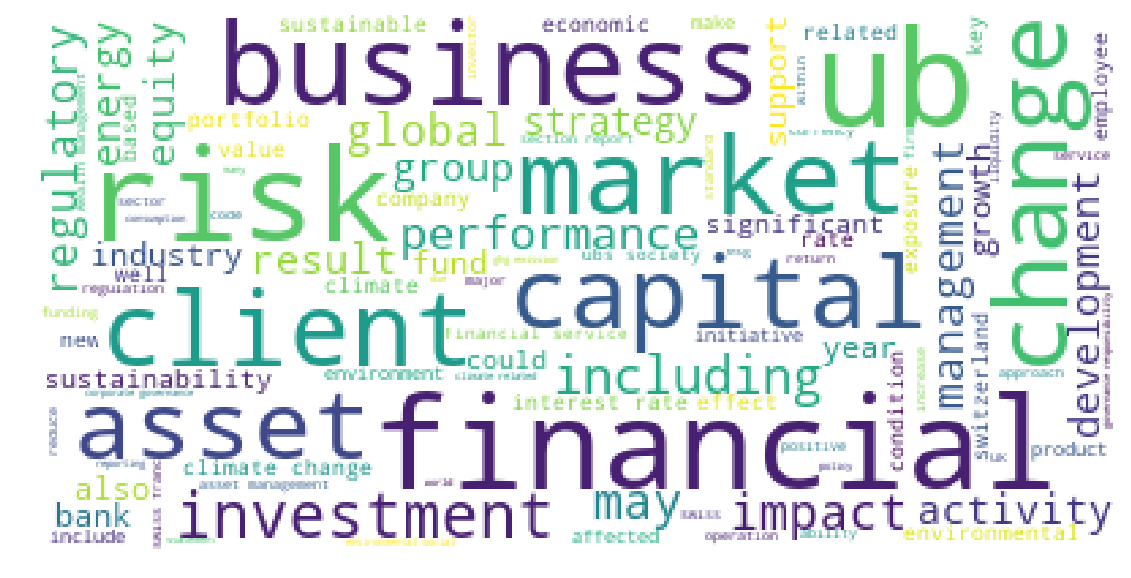

In [12]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1, figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

list(cv.vocabulary_.keys())[:10]


['content',
 'shareholder',
 'key',
 'figure',
 'board',
 'director',
 'group',
 'external',
 'reporting',
 'approach']

[Text(0,0,'ubs'),
 Text(0,0,'financial'),
 Text(0,0,'risk'),
 Text(0,0,'change'),
 Text(0,0,'market'),
 Text(0,0,'asset'),
 Text(0,0,'business'),
 Text(0,0,'climate'),
 Text(0,0,'investment'),
 Text(0,0,'management'),
 Text(0,0,'capital'),
 Text(0,0,'client'),
 Text(0,0,'impact'),
 Text(0,0,'including'),
 Text(0,0,'service'),
 Text(0,0,'energy'),
 Text(0,0,'bank'),
 Text(0,0,'rate'),
 Text(0,0,'corporate'),
 Text(0,0,'may')]

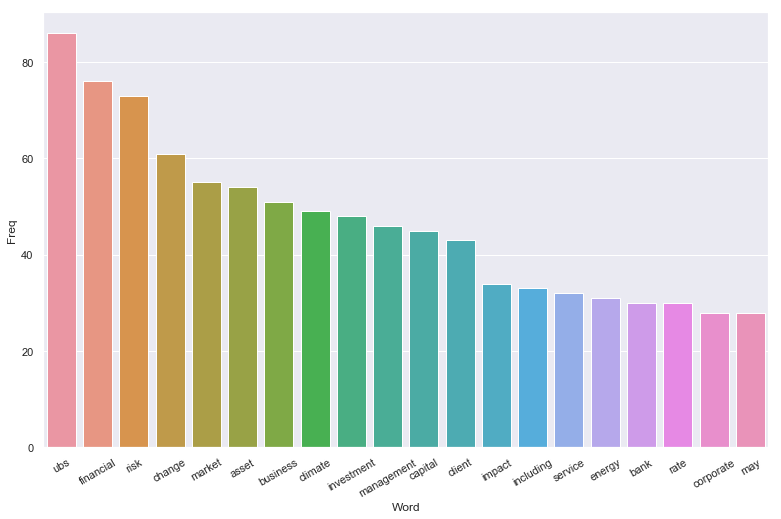

In [14]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                      Bi-gram  Freq
0              climate change    17
1               interest rate    14
2              section report    13
3                 ubs society    12
4           financial service    12
5           wealth management    11
6            asset management    11
7                 swiss franc    11
8        corporate governance    10
9   governance responsibility    10
10       environmental social    10
11            climate related    10
12               ghg emission    10
13           adversely affect     9
14            investment bank     8
15                risk factor     8
16            emerging market     8
17                  long term     8
18           renewable energy     8
19                chf billion     8


[Text(0,0,'climate change'),
 Text(0,0,'interest rate'),
 Text(0,0,'section report'),
 Text(0,0,'ubs society'),
 Text(0,0,'financial service'),
 Text(0,0,'wealth management'),
 Text(0,0,'asset management'),
 Text(0,0,'swiss franc'),
 Text(0,0,'corporate governance'),
 Text(0,0,'governance responsibility'),
 Text(0,0,'environmental social'),
 Text(0,0,'climate related'),
 Text(0,0,'ghg emission'),
 Text(0,0,'adversely affect'),
 Text(0,0,'investment bank'),
 Text(0,0,'risk factor'),
 Text(0,0,'emerging market'),
 Text(0,0,'long term'),
 Text(0,0,'renewable energy'),
 Text(0,0,'chf billion')]

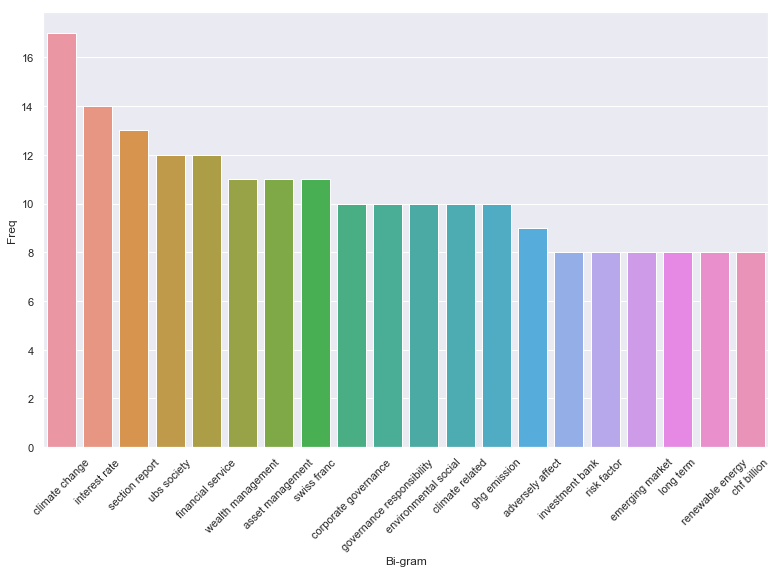

In [15]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                                     Tri-gram  Freq
0         corporate governance responsibility     8
1                      negative interest rate     7
2                       transition low carbon     7
3                          low carbon economy     7
4                     market climate industry     6
5                  personal corporate banking     6
6      governance responsibility compensation     6
7                  section report information     6
8                        swiss franc currency     6
9                         risk factor section     6
10                      factor section report     6
11            environmental social governance     5
12                       climate related risk     5
13                 financial service industry     4
14                         deferred tax asset     4
15  governance responsibility compensationubs     4
16                        climate change risk     4
17                       carbon related asset     4
18          

[Text(0,0,'corporate governance responsibility'),
 Text(0,0,'negative interest rate'),
 Text(0,0,'transition low carbon'),
 Text(0,0,'low carbon economy'),
 Text(0,0,'market climate industry'),
 Text(0,0,'personal corporate banking'),
 Text(0,0,'governance responsibility compensation'),
 Text(0,0,'section report information'),
 Text(0,0,'swiss franc currency'),
 Text(0,0,'risk factor section'),
 Text(0,0,'factor section report'),
 Text(0,0,'environmental social governance'),
 Text(0,0,'climate related risk'),
 Text(0,0,'financial service industry'),
 Text(0,0,'deferred tax asset'),
 Text(0,0,'governance responsibility compensationubs'),
 Text(0,0,'climate change risk'),
 Text(0,0,'carbon related asset'),
 Text(0,0,'climate change mitigation'),
 Text(0,0,'change mitigation adaptation')]

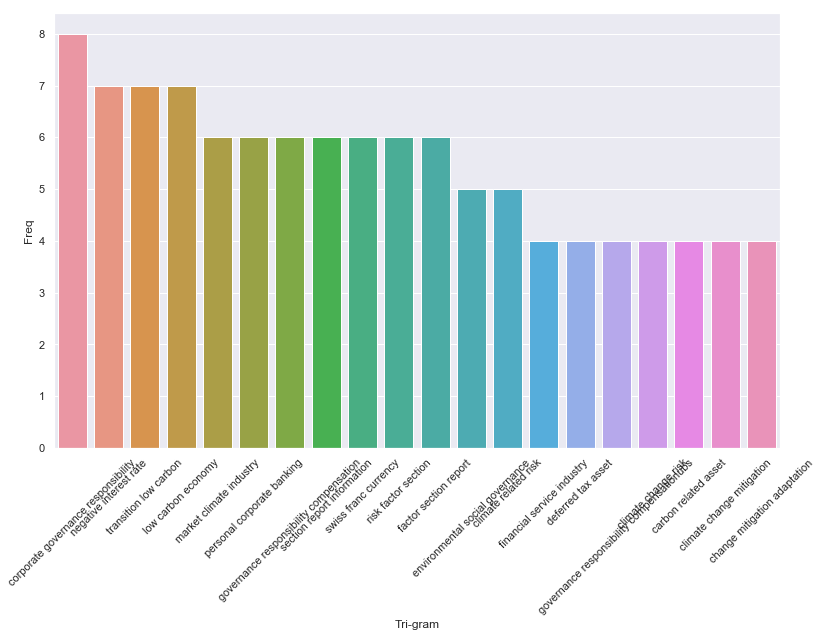

In [16]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[10]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))


#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])





Abstract:
corporate governance responsibility compensationubs societyclimate related metric protecting assetsfinancial impact climate related risk opportunitiesno significant financial risk balance sheet identified past stress test group bank including ubs unep fi partnered refine methodology risk opportunitiescarbon related asset chf billion total net credit exposure protecting client asset mobilizing private institutional capitalchf billion ubs client total invested asset total deal value equity debt capital market service related climate change mitigation adaptation chf billion chf billion financial advisory servicesfour strategic transaction support switzerland energy strategy product service supporting lower carbon economysupport climate related shareholder resolution reducing climate change impactghg footprint kiloton co etarget reduce ghg footprint based level greenhouse gas emissionsweighted carbon intensity climate aware equity strategy co e per million usd revenue lower benc